In [32]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [33]:
#dataframe = pd.read_csv(r"C:\Users\Personal-Pc\Desktop\Inteligencia Artificial\Proyecto\Data\features_labels_dataset_1.csv")
dataframe = pd.read_csv(r"C:\Users\Sergio\Desktop\Inteligencia artificial\Proyecto\Data\features_labels_dataset_3_sec.csv")
dataframe.head(10)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,contrast,tonnetz,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.335791,0.130405,1772.762360,1972.665750,3714.229079,0.081866,20.878743,0.008404,-118.642891,125.088127,...,10.197959,-4.688856,8.405816,-7.243358,-2.891171,-3.283726,0.696735,-5.057118,-0.246129,blues
1,0.341392,0.112799,1815.841814,2008.583444,3867.611741,0.087196,20.638202,0.027907,-125.622566,122.470024,...,8.156417,-7.801244,8.442777,-8.315190,4.067089,-6.067421,0.227450,-2.781118,5.835648,blues
2,0.349544,0.131949,1788.911794,2085.567011,3994.326360,0.071484,20.472906,0.008297,-132.475159,114.985214,...,11.783042,-4.840505,6.406030,-2.600263,4.712676,-1.675564,2.530837,-1.788759,2.615664,blues
3,0.362231,0.132537,1655.187628,1959.222456,3572.855319,0.069370,20.403429,0.009164,-118.234093,132.079025,...,10.160534,-4.553882,8.790072,-9.978915,-1.449336,-3.714067,1.373425,-3.312367,3.801208,blues
4,0.333605,0.143271,1632.202905,1949.749021,3469.081843,0.070207,20.346041,0.015876,-105.871307,134.560730,...,16.951412,-5.765418,5.737076,-7.992009,2.249286,0.626643,1.659127,-3.345108,0.692240,blues
5,0.373792,0.132642,1997.047482,2156.267230,4378.942495,0.092495,19.925646,0.023157,-100.671448,111.440056,...,9.388761,-3.458952,6.744032,-7.038368,2.056856,-3.547106,-0.427790,-3.655148,3.062379,blues
6,0.385790,0.130383,1959.585393,2145.142660,4312.023926,0.089412,19.838252,-0.002783,-102.007484,117.337440,...,11.701143,-8.015904,7.524295,-5.747482,5.051671,-2.076014,1.520618,-3.290981,3.317939,blues
7,0.330234,0.140386,1699.303844,1978.229591,3623.458346,0.070921,20.578568,0.009589,-109.143425,127.705437,...,11.543928,-4.083392,7.329354,-4.985634,3.141679,-3.570688,-0.162427,-2.016627,0.085462,blues
8,0.349116,0.132991,1747.764206,1891.144510,3587.431641,0.087722,20.747021,0.008688,-113.181129,128.841400,...,8.259405,-7.249505,5.983247,-9.817375,-0.124296,-4.291426,2.151545,-2.252159,3.718989,blues
9,0.354592,0.115296,1761.011103,1871.996252,3499.642428,0.101743,20.930979,0.002127,-125.395287,126.827896,...,9.234389,-4.536611,9.634242,-4.280639,6.595001,-3.289674,0.137098,-7.608109,0.703812,blues


### Análisis de componentes principales: para visualizar posibles grupos de géneros.

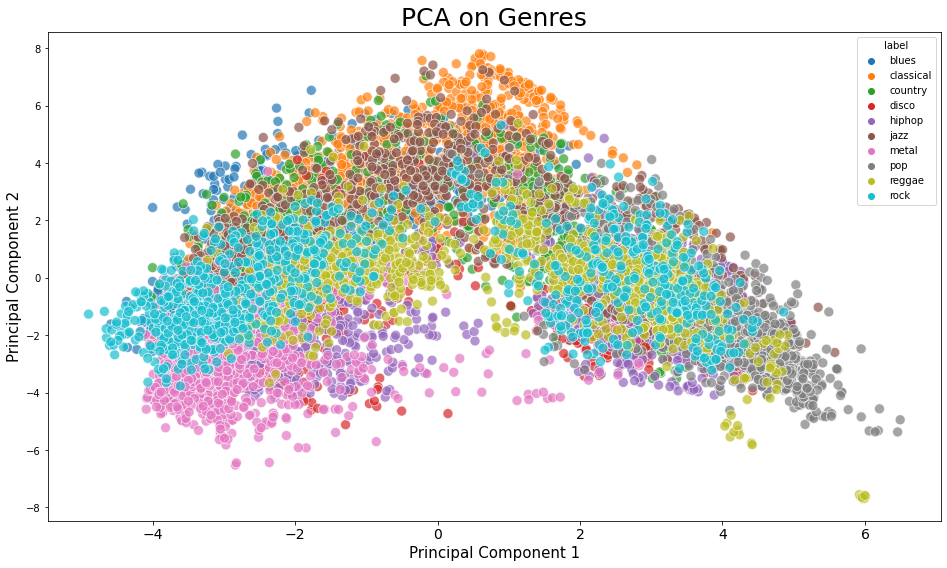

In [34]:
y = dataframe['label']
X = dataframe.loc[:, dataframe.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(X)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X = scaler.transform(X)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

### Pre-procesamiento

In [35]:
y = dataframe['label'].values # genre variable.
X = dataframe.loc[:, dataframe.columns != 'label'].values #select all columns but not the labels

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.preprocessing import label_binarize


# Binarize the output
#y = label_binarize(y, classes=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
#n_classes = y.shape[1]

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression:

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score


# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(random_state = 0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_test_predicted = classifier.predict(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)


matthews_corrcoef 0.5893126192366578
Accuracy 0.6301040832666133


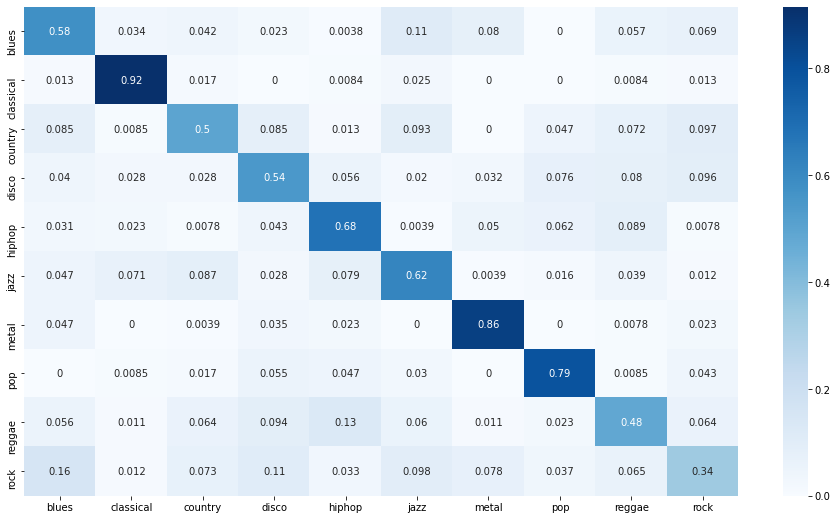

In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matr = confusion_matrix(y_test, y_test_predicted,normalize = 'true') #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### Naive Bayes:

In [41]:
from sklearn.naive_bayes import GaussianNB

# Learn to predict each class against the other
classifier = GaussianNB().fit(X_train, y_train)
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_test_predicted = classifier.predict(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

matthews_corrcoef 0.3543687401120347
Accuracy 0.41072858286629305


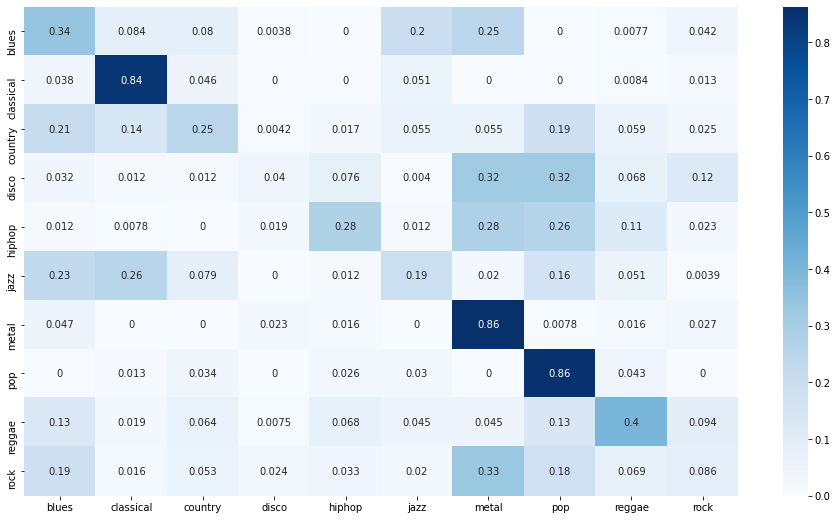

In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matr = confusion_matrix(y_test, y_test_predicted,normalize = 'true') #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### KNeighborsClassifier:

matthews_corrcoef 0.9070995048864818
Accuracy 0.9163330664531625


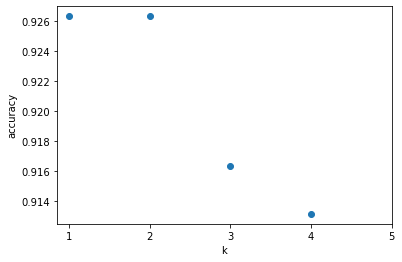

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
import math

#obteniendo el mejor valor de K a partir del conjunto de validación con mejor accuracy
k_range = range(1, 5)
scores = []
distance= 'manhattan'
for k in k_range:
    classifier = OneVsRestClassifier(KNeighborsClassifier(k,weights='distance',metric=distance, metric_params=None,algorithm='brute'))
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([1,2,3,4,5])


n_neighbors = 3
classifier = KNeighborsClassifier(n_neighbors,weights='distance',metric=distance, metric_params=None,algorithm='brute')
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_test_predicted = classifier.predict(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

# euclidean - 0.910728582866293
# manhattan - 0.9127301841473179
# chebyshev - 0.8310648518815053
# minkowski - 0.910728582866293
# seuclidean - 0.910328262610088

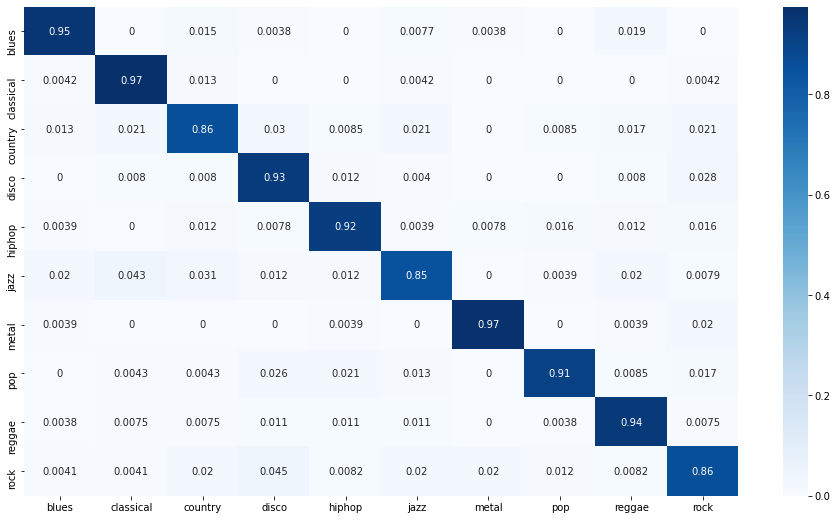

In [44]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matr = confusion_matrix(y_test, y_test_predicted,normalize = 'true') #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### SVM:

In [50]:
from sklearn import svm
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score


kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
#Kernel=0
#msv = svm.SVC(kernel=kernels[Kernel])

#polinomial cuadrático
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=2,C=5000, gamma=0.1, shrinking=True)

#polinomial cúbico
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=3,C=5000, gamma=0.1, shrinking=True)

#polinomial orden 6
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=6,C=5000, gamma=0.1, shrinking=True)

#rbf 
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel], C=5000, gamma=0.1, shrinking=True)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv.fit(X_train, y_train)

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

#         Lineal - 0.6809447558046438
# 2 - Polinomico - 0.7922337870296237
# 3 - Polinomico - 0.8730984787830264
# 4 - Polinomico - 0.8286629303442754
# 5 - Polinomico - 0.8346677341873499
# 6 - Polinomico - 0.767013610888711
#            RBF - 0.9271417133706965

matthews_corrcoef 0.9190958639773883
Accuracy 0.9271417133706965


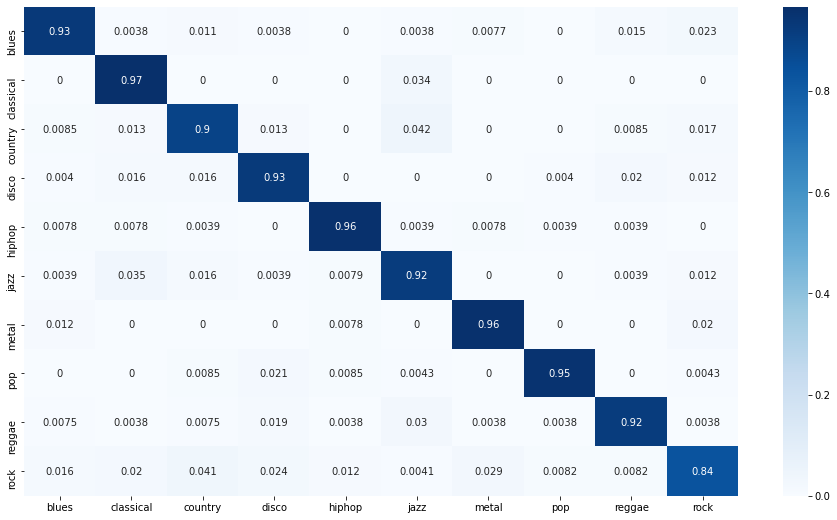

In [46]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matr = confusion_matrix(y_test, y_test_predicted,normalize = 'true') #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### Neural Network

In [47]:
from sklearn.neural_network import MLPClassifier
import sklearn

verbose = False
learning_rate_init = 0.0003

clf = MLPClassifier(hidden_layer_sizes=(5000, 10),activation='relu',random_state=1, verbose=verbose, learning_rate_init=learning_rate_init)

clf.fit(X_train, y_train)

y_test_predicted = clf.predict(X_test)
y_test_scores = clf.predict_proba(X_test)
y_test_scores = y_test_scores[:,1]
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

matthews_corrcoef 0.8812684110865228
Accuracy 0.8931144915932746


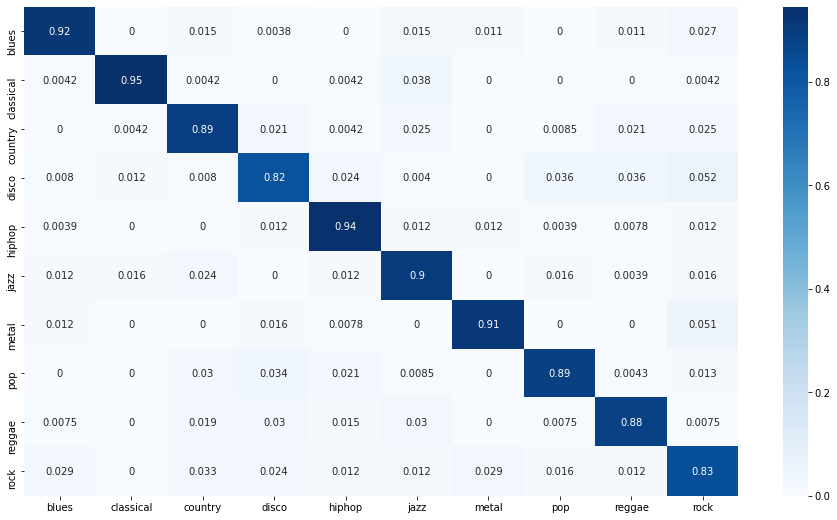

In [48]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matr = confusion_matrix(y_test, y_test_predicted,normalize = 'true') #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### Importancia de las caracteristicas elegidas

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=msv, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = ['chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate','contrast','tonnetz','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20'])

Weight,Feature
0.1478 ± 0.0090,rmse
0.1421 ± 0.0084,contrast
0.1162 ± 0.0082,mfcc4
0.0898 ± 0.0102,mfcc1
0.0867 ± 0.0063,mfcc2
0.0831 ± 0.0060,mfcc3
0.0724 ± 0.0044,chroma_stft
0.0722 ± 0.0108,mfcc5
0.0693 ± 0.0045,mfcc7
0.0689 ± 0.0103,mfcc9
